In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd95e6f28-4360-40a8-80f4-92302646b861',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df.head()

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9990,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.930323e+07,1.930323e+07,NaN,1,NaN,NaN,None,2023-02-27T14:26:00.000Z,23776.763173,1.913224e+10,26.9732,1.111415,2.138103,-4.575646,3.459991,43.032517,44.876151,4.589684e+11,42.3208,4.993120e+11,None,2023-02-27T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-27 14:31:03.584719
1,1027,Ethereum,ETH,ethereum,6502,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-27T14:26:00.000Z,1660.996350,6.657197e+09,23.5945,0.850544,3.261052,-2.799987,5.526614,38.236799,37.445541,2.032625e+11,18.7402,2.032625e+11,None,2023-02-27T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-27 14:31:03.584719
2,825,Tether,USDT,tether,48414,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.088373e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-27T14:26:00.000Z,1.000102,2.700832e+10,17.9786,0.001172,-0.004869,-0.006764,-0.012479,0.030818,0.035016,7.089099e+10,6.5367,7.314926e+10,None,2023-02-27T14:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-27 14:31:03.584719
3,1839,BNB,BNB,bnb,1196,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578956e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-27T14:26:00.000Z,307.244973,3.765505e+08,21.8088,0.695910,0.996956,-3.343962,0.676974,24.928723,2.427655,4.851263e+10,4.4710,4.915304e+10,None,2023-02-27T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-27 14:31:03.584719
4,3408,USD Coin,USDC,usd-coin,10357,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.262692e+10,4.262692e+10,NaN,5,NaN,NaN,None,2023-02-27T14:26:00.000Z,1.000252,2.889095e+09,12.8222,0.016356,0.021286,0.018527,0.028893,0.015762,0.006144,4.263768e+10,3.9337,4.263768e+10,None,2023-02-27T14:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-27 14:31:03.584719


In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\asus\Phyton script\API.csv'):
        #df.to_csv(r'C:\Users\asus\Phyton script\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\asus\Phyton script\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\asus\Phyton script\API.csv')
        
# If that didn't work try using the local host URL as shown in the video

In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\asus\AppData\Local\Temp\ipykernel_15656\3356324149.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\asus\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\asus\AppData\Local\Temp\ipykernel_15656\3356324149.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [8]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9990,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.930323e+07,1.930323e+07,NaN,1,NaN,NaN,None,2023-02-27T14:26:00.000Z,23776.763173,1.913224e+10,26.9732,1.111415,2.138103,-4.575646,3.459991,43.032517,44.876151,4.589684e+11,42.3208,4.993120e+11,None,2023-02-27T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-27 14:28:37.513296,NaT
1,1027,Ethereum,ETH,ethereum,6502,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-27T14:26:00.000Z,1660.996350,6.657197e+09,23.5945,0.850544,3.261052,-2.799987,5.526614,38.236799,37.445541,2.032625e+11,18.7402,2.032625e+11,None,2023-02-27T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-27 14:28:37.513296,NaT
2,825,Tether,USDT,tether,48414,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.088373e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-27T14:26:00.000Z,1.000102,2.700832e+10,17.9786,0.001172,-0.004869,-0.006764,-0.012479,0.030818,0.035016,7.089099e+10,6.5367,7.314926e+10,None,2023-02-27T14:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-27 14:28:37.513296,NaT
3,1839,BNB,BNB,bnb,1196,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578956e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-27T14:26:00.000Z,307.244973,3.765505e+08,21.8088,0.695910,0.996956,-3.343962,0.676974,24.928723,2.427655,4.851263e+10,4.4710,4.915304e+10,None,2023-02-27T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-27 14:28:37.513296,NaT
4,3408,USD Coin,USDC,usd-coin,10357,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.262692e+10,4.262692e+10,NaN,5,NaN,NaN,None,2023-02-27T14:26:00.000Z,1.000252,2.889095e+09,12.8222,0.016356,0.021286,0.018527,0.028893,0.015762,0.006144,4.263768e+10,3.9337,4.263768e+10,None,2023-02-27T14:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-27 14:28:37.513296,NaT


In [10]:
df72 = pd.read_csv(r'C:\Users\asus\Phyton script\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9982,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.929279e+07,1.929279e+07,NaN,1,NaN,NaN,NaN,2023-02-16T14:51:00.000Z,24407.277502,3.549180e+10,25.9333,-0.241851,7.238935,7.320285,15.191315,45.965927,46.226087,4.708844e+11,42.7473,5.125528e+11,NaN,2023-02-16T14:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 14:52:58.276670
1,1,1027,Ethereum,ETH,ethereum,6465,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-02-16T14:51:00.000Z,1675.693468,1.175249e+10,33.4296,-0.067233,6.058594,2.123872,6.296949,42.184014,38.082808,2.050611e+11,18.5952,2.050611e+11,NaN,2023-02-16T14:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 14:52:58.276670
2,2,825,Tether,USDT,tether,47677,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.978573e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-02-16T14:51:00.000Z,1.000212,5.050808e+10,22.6506,-0.000309,-0.015025,0.010239,0.010578,0.008042,0.087667,6.980054e+10,6.3328,7.315729e+10,NaN,2023-02-16T14:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-16 14:52:58.276670
3,3,1839,BNB,BNB,bnb,1190,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.578981e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-02-16T14:51:00.000Z,316.924825,9.338701e+08,60.9013,-0.124010,3.990836,-1.445048,4.781563,28.844802,16.508779,5.004183e+10,4.5438,6.338496e+10,NaN,2023-02-16T14:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 14:52:58.276670
4,4,3408,USD Coin,USDC,usd-coin,10120,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.162454e+10,4.162454e+10,NaN,5,NaN,NaN,NaN,2023-02-16T14:51:00.000Z,1.000181,5.186013e+09,26.6064,0.032462,0.006356,0.006551,0.009702,0.024749,0.003331,4.163208e+10,3.7797,4.163208e+10,NaN,2023-02-16T14:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-16 14:52:58.276670
5,5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.079908e+10,9.998913e+10,NaN,6,NaN,NaN,NaN,2023-02-16T14:51:00.000Z,0.396654,1.151519e+09,15.0954,-0.132232,2.338719,-2.153723,2.375640,13.207090,4.449144,2.014967e+10,1.8272,3.966543e+10,NaN,2023-02-16T14:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 14:52:58.276670
6,6,4687,Binance USD,BUSD,binance-usd,6214,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.397471e+10,1.397471e+10,NaN,7,NaN,NaN,NaN,2023-02-16T14:51:00.000Z,1.000139,1.177196e+10,26.6772,0.008423,-0.006643,-0.004856,0.011453,0.015960,-0.037985,1.397664e+10,1.2681,1.397664e+10,NaN,2023-02-16T14:51:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-16 14:52:58.276670
7,7,2010,Cardano,ADA,cardano,649,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.463436e+10,3.548507e+10,NaN,8,NaN,NaN,NaN,2023-02-16T14:51:00.000Z,0.400509,5.612749e+08,8.4786,-0.120224,2.202483,3.022024,13.186253,50.997929,22.420952,1.387137e+10,1.2585,1.802291e+10,NaN,2023-02-16T14:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 14:52:58.276670
8,8,3890,Polygon,MATIC,polygon,587,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,

In [11]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9990,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.930323e+07,1.930323e+07,NaN,1,NaN,NaN,None,2023-02-27T14:26:00.000Z,23776.763173,1.913224e+10,26.9732,1.111415,2.138103,-4.575646,3.459991,43.032517,44.876151,4.589684e+11,42.3208,4.993120e+11,None,2023-02-27T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-27 14:31:03.584719
1,1027,Ethereum,ETH,ethereum,6502,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-27T14:26:00.000Z,1660.996350,6.657197e+09,23.5945,0.850544,3.261052,-2.799987,5.526614,38.236799,37.445541,2.032625e+11,18.7402,2.032625e+11,None,2023-02-27T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-27 14:31:03.584719
2,825,Tether,USDT,tether,48414,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.088373e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-27T14:26:00.000Z,1.000102,2.700832e+10,17.9786,0.001172,-0.004869,-0.006764,-0.012479,0.030818,0.035016,7.089099e+10,6.5367,7.314926e+10,None,2023-02-27T14:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-27 14:31:03.584719
3,1839,BNB,BNB,bnb,1196,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578956e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-27T14:26:00.000Z,307.244973,3.765505e+08,21.8088,0.695910,0.996956,-3.343962,0.676974,24.928723,2.427655,4.851263e+10,4.4710,4.915304e+10,None,2023-02-27T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-27 14:31:03.584719
4,3408,USD Coin,USDC,usd-coin,10357,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.262692e+10,4.262692e+10,NaN,5,NaN,NaN,None,2023-02-27T14:26:00.000Z,1.000252,2.889095e+09,12.8222,0.016356,0.021286,0.018527,0.028893,0.015762,0.006144,4.263768e+10,3.9337,4.263768e+10,None,2023-02-27T14:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-27 14:31:03.584719


In [12]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [14]:

df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9990,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19303231.00000,19303231.00000,NaN,1,NaN,NaN,None,2023-02-27T14:26:00.000Z,23776.76317,19132239630.12316,26.97320,1.11141,2.13810,-4.57565,3.45999,43.03252,44.87615,458968351970.23212,42.32080,499312026643.35999,None,2023-02-27T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-27 14:31:03.584719
1,1027,Ethereum,ETH,ethereum,6502,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-02-27T14:26:00.000Z,1660.99635,6657196923.24209,23.59450,0.85054,3.26105,-2.79999,5.52661,38.23680,37.44554,203262545168.78427,18.74020,203262545168.78000,None,2023-02-27T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-27 14:31:03.584719
2,825,Tether,USDT,tether,48414,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,70883728837.83070,73141766321.23428,NaN,3,NaN,NaN,None,2023-02-27T14:26:00.000Z,1.00010,27008319442.49713,17.97860,0.00117,-0.00487,-0.00676,-0.01248,0.03082,0.03502,70890993527.54364,6.53670,73149262431.36000,None,2023-02-27T14:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-27 14:31:03.584719
3,1839,BNB,BNB,bnb,1196,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157895615.09017,159979963.59043,NaN,4,NaN,NaN,None,2023-02-27T14:26:00.000Z,307.24497,376550469.74616,21.80880,0.69591,0.99696,-3.34396,0.67697,24.92872,2.42766,48512633993.22346,4.47100,49153039591.88000,None,2023-02-27T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-27 14:31:03.584719
4,3408,USD Coin,USDC,usd-coin,10357,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42626923283.40900,42626923283.40900,NaN,5,NaN,NaN,None,2023-02-27T14:26:00.000Z,1.00025,2889094863.84985,12.82220,0.01636,0.02129,0.01853,0.02889,0.01576,0.00614,42637675308.15765,3.93370,42637675308.16000,None,2023-02-27T14:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-27 14:31:03.584719


In [15]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.11141,2.13810,-4.57565,3.45999,43.03252,44.87615
Ethereum,0.85054,3.26105,-2.79999,5.52661,38.23680,37.44554
Tether,0.00117,-0.00487,-0.00676,-0.01248,0.03082,0.03502
BNB,0.69591,0.99696,-3.34396,0.67697,24.92872,2.42766
USD Coin,0.01636,0.02129,0.01853,0.02889,0.01576,0.00614
XRP,0.74221,0.18726,-5.02756,-7.35153,9.43459,-3.63758
Cardano,1.26088,1.06117,-9.78445,-3.48098,49.75886,19.14472
Polygon,2.13262,-0.16184,-14.28930,15.74620,63.02743,53.03576
Dogecoin,1.00354,0.63996,-7.11553,-6.97527,15.80344,-19.35031


In [19]:
df4 = df3.stack()
df4.head(25)

name                                  
Bitcoin   quote.USD.percent_change_1h     1.11141
          quote.USD.percent_change_24h    2.13810
          quote.USD.percent_change_7d    -4.57565
          quote.USD.percent_change_30d    3.45999
          quote.USD.percent_change_60d   43.03252
          quote.USD.percent_change_90d   44.87615
Ethereum  quote.USD.percent_change_1h     0.85054
          quote.USD.percent_change_24h    3.26105
          quote.USD.percent_change_7d    -2.79999
          quote.USD.percent_change_30d    5.52661
          quote.USD.percent_change_60d   38.23680
          quote.USD.percent_change_90d   37.44554
Tether    quote.USD.percent_change_1h     0.00117
          quote.USD.percent_change_24h   -0.00487
          quote.USD.percent_change_7d    -0.00676
          quote.USD.percent_change_30d   -0.01248
          quote.USD.percent_change_60d    0.03082
          quote.USD.percent_change_90d    0.03502
BNB       quote.USD.percent_change_1h     0.69591
          q

In [20]:
type(df4)

pandas.core.series.Series

In [22]:
df5 = df4.to_frame(name='values')
df5.head(30)

values
name                                          
Bitcoin  quote.USD.percent_change_1h   1.11141
         quote.USD.percent_change_24h  2.13810
         quote.USD.percent_change_7d  -4.57565
         quote.USD.percent_change_30d  3.45999
         quote.USD.percent_change_60d 43.03252
         quote.USD.percent_change_90d 44.87615
Ethereum quote.USD.percent_change_1h   0.85054
         quote.USD.percent_change_24h  3.26105
         quote.USD.percent_change_7d  -2.79999
         quote.USD.percent_change_30d  5.52661
         quote.USD.percent_change_60d 38.23680
         quote.USD.percent_change_90d 37.44554
Tether   quote.USD.percent_change_1h   0.00117
         quote.USD.percent_change_24h -0.00487
         quote.USD.percent_change_7d  -0.00676
         quote.USD.percent_change_30d -0.01248
         quote.USD.percent_change_60d  0.03082
         quote.USD.percent_change_90d  0.03502
BNB      quote.USD.percent_change_1h   0.69591
         quote.USD.percent_change_24h  0.99696
         quote.USD.percent_change_7d  -3.34396
         quote.USD.percent_change_30d  0.67697
         quote.USD.percent_change_60d 24.92872
         quote.USD.percent_change_90d  2.42766
USD Coin quote.USD.percent_change_1h   0.01636
         quote.USD.percent_change_24h  0.02129
         quote.USD.percent_change_7d   0.01853
         quote.USD.percent_change_30d  0.02889
         quote.USD.percent_change_60d  0.01576
         quote.USD.percent_change_90d  0.00614

In [23]:
df5.count()

values    90
dtype: int64

In [26]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


#index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
#df6 = df5.set_index(index)
#df6

df6 = df5.reset_index()
df6.head()

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.11141
1,Bitcoin,quote.USD.percent_change_24h,2.13810
2,Bitcoin,quote.USD.percent_change_7d,-4.57565
3,Bitcoin,quote.USD.percent_change_30d,3.45999
4,Bitcoin,quote.USD.percent_change_60d,43.03252


In [28]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.11141
1,Bitcoin,quote.USD.percent_change_24h,2.13810
2,Bitcoin,quote.USD.percent_change_7d,-4.57565
3,Bitcoin,quote.USD.percent_change_30d,3.45999
4,Bitcoin,quote.USD.percent_change_60d,43.03252


In [29]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7.head()

,name,percent_change,values
0,Bitcoin,1h,1.11141
1,Bitcoin,24h,2.13810
2,Bitcoin,7d,-4.57565
3,Bitcoin,30d,3.45999
4,Bitcoin,60d,43.03252


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

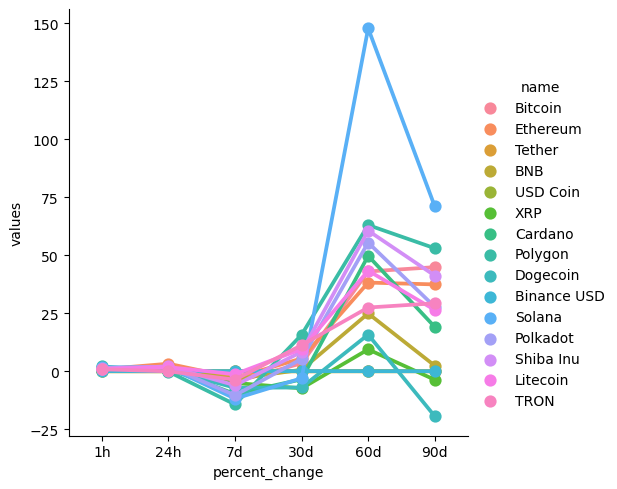

In [31]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [32]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,23776.76317,2023-02-27 14:31:03.584719


In [33]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>